In [93]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from sklearn.preprocessing import StandardScaler
from collections import Counter

In [102]:
with open('/repos/Delivery-Readiness/data/5min/largest_window/train_1.pickle', 'rb') as handle:
    train = pickle.load(handle)
with open('/repos/Delivery-Readiness/data/5min/largest_window/test_1.pickle', 'rb') as handle:
    test = pickle.load(handle)
X_train = np.array(train['X'])
# X_train = savgol_filter(X_train, 15, 5)
y_train = np.array(train['y'])
X_test = np.array(test['X'])
y_test = np.array(test['y'])
label = train['feature_name']
label = [x.replace('_', '') for x in label]
uid = np.array(train['uid']).astype(np.int32)

X_train_scaled = np.zeros_like(X_train)
X_test_scaled = np.zeros_like(X_test)
for i in range(X_train.shape[1]):
    scaler = StandardScaler().fit(X_train[:,i,:])
    X_train_scaled[:,i,:] = scaler.transform(X_train[:,i,:])
    X_test_scaled[:,i,:] = scaler.transform(X_test[:,i,:])

In [105]:
same_user_indices = []
diff_user_indices = []
count_uid = Counter(uid)
for each_uid in count_uid.keys():
    indices = np.where(np.array(uid) == each_uid)[0]
    if count_uid[each_uid] > 1:
        same_user_indices.extend(indices.tolist())
    else:
        diff_user_indices.extend(indices.tolist())
X_train = X_train[same_user_indices,:,:]
y_train = y_train[same_user_indices]

In [106]:
pos_indices_train = np.where(y_train==1)
neg_indices_train = np.where(y_train==0)
pos_indices_test = np.where(y_test==1)
neg_indices_test = np.where(y_test==0)
pos_indices = pos_indices_train
neg_indices = neg_indices_train

In [107]:
pos_mean = X_train[pos_indices].mean(axis=0)
neg_mean = X_train[neg_indices].mean(axis=0)

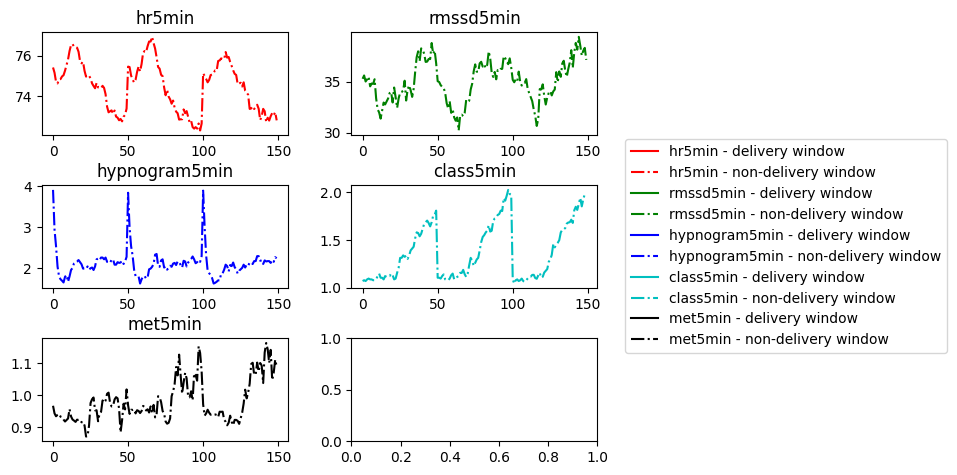

In [100]:
f, ax = plt.subplots(3, 2)
f.tight_layout(pad=1.5)

legend_labels = []
for i in range(len(label)):
    legend_labels.append(f'{label[i]} - delivery window')
    legend_labels.append(f'{label[i]} - non-delivery window')
pos1, = ax[0][0].plot(pos_mean[0], 'r')
neg1, = ax[0][0].plot(neg_mean[0], 'r-.')
ax[0][0].title.set_text(label[0])

pos2, = ax[0][1].plot(pos_mean[1], 'g')
neg2, = ax[0][1].plot(neg_mean[1], 'g-.')
ax[0][1].title.set_text(label[1])

pos3, = ax[1][0].plot(pos_mean[2], 'b')
neg3, = ax[1][0].plot(neg_mean[2], 'b-.')
ax[1][0].title.set_text(label[2])

pos4, = ax[1][1].plot(pos_mean[3], 'c')
neg4, = ax[1][1].plot(neg_mean[3], 'c-.')
ax[1][1].title.set_text(label[3])

pos5, = ax[2][0].plot(pos_mean[4], 'k')
neg5, = ax[2][0].plot(neg_mean[4], 'k-.')
ax[2][0].title.set_text(label[4])

plt.legend([pos1, neg1, pos2, neg2, pos3, neg3, pos4, neg4, pos5, neg5], legend_labels, bbox_to_anchor=(2.45, 3))
plt.show()

high
medium
low
inactive
rest


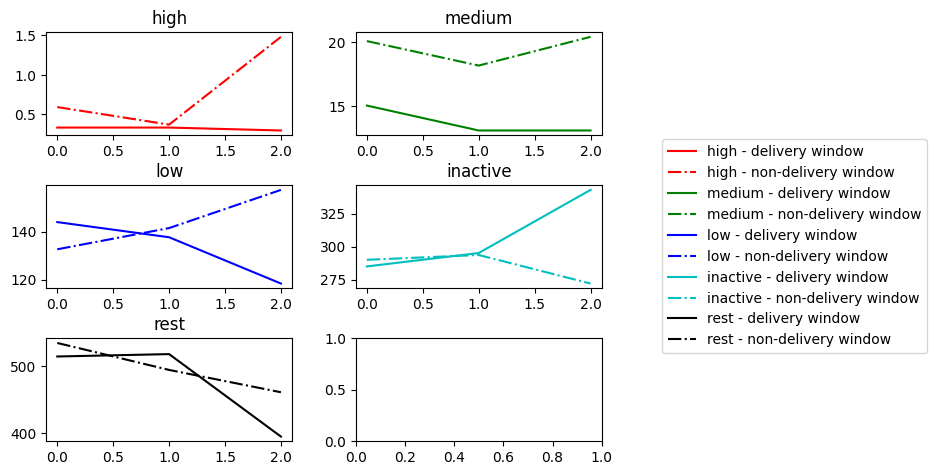

In [53]:
with open('/repos/Delivery-Readiness/data/daily/largest_window/train_1.pickle', 'rb') as handle:
    train = pickle.load(handle)
with open('/repos/Delivery-Readiness/data/daily/largest_window/test_1.pickle', 'rb') as handle:
    test = pickle.load(handle)
oura_sleep_list = ['hr_lowest', 'hr_average', 'rmssd', 'deep', 'light', 'awake', 'rem']
oura_activity_list = ['high', 'medium', 'low', 'inactive', 'rest', 'met_min_inactive', 'met_min_low', 'met_min_medium', 'met_min_high', 'average_met']
X_train = np.array(train['X'])
y_train = np.array(train['y'])
X_test = np.array(test['X'])
y_test = np.array(test['y'])
label = oura_activity_list + oura_sleep_list
# label = [x.replace('_', '') for x in label]
uid = np.array(train['uid']).astype(np.int32)

pos_indices = np.where(y_test==1)
neg_indices = np.where(y_test==0)

pos_mean = X_test[pos_indices].mean(axis=0)
neg_mean = X_test[neg_indices].mean(axis=0)
f, ax = plt.subplots(3, 2)
f.tight_layout(pad=1.5)
legend_labels = []
for i in range(5):
    print(label[i])
    legend_labels.append(f'{label[i]} - delivery window')
    legend_labels.append(f'{label[i]} - non-delivery window')
pos1, = ax[0][0].plot(pos_mean[0], 'r')
neg1, = ax[0][0].plot(neg_mean[0], 'r-.')
ax[0][0].title.set_text(label[0])

pos2, = ax[0][1].plot(pos_mean[1], 'g')
neg2, = ax[0][1].plot(neg_mean[1], 'g-.')
ax[0][1].title.set_text(label[1])

pos3, = ax[1][0].plot(pos_mean[2], 'b')
neg3, = ax[1][0].plot(neg_mean[2], 'b-.')
ax[1][0].title.set_text(label[2])

pos4, = ax[1][1].plot(pos_mean[3], 'c')
neg4, = ax[1][1].plot(neg_mean[3], 'c-.')
ax[1][1].title.set_text(label[3])

pos5, = ax[2][0].plot(pos_mean[4], 'k')
neg5, = ax[2][0].plot(neg_mean[4], 'k-.')
ax[2][0].title.set_text(label[4])


plt.legend([pos1, neg1, pos2, neg2, pos3, neg3, pos4, neg4, pos5, neg5], legend_labels, bbox_to_anchor=(2.35, 3))
plt.show()

met_min_inactive
met_min_low
met_min_medium
met_min_high
average_met


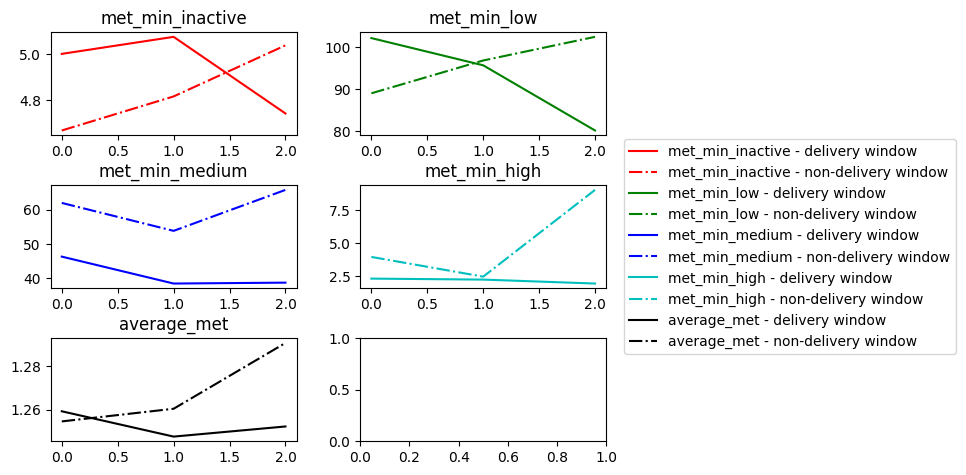

In [55]:
f, ax = plt.subplots(3, 2)
f.tight_layout(pad=1.5)
legend_labels = []
for i in range(5,10):
    print(label[i])
    legend_labels.append(f'{label[i]} - delivery window')
    legend_labels.append(f'{label[i]} - non-delivery window')
pos1, = ax[0][0].plot(pos_mean[5], 'r')
neg1, = ax[0][0].plot(neg_mean[5], 'r-.')
ax[0][0].title.set_text(label[5])

pos2, = ax[0][1].plot(pos_mean[6], 'g')
neg2, = ax[0][1].plot(neg_mean[6], 'g-.')
ax[0][1].title.set_text(label[6])

pos3, = ax[1][0].plot(pos_mean[7], 'b')
neg3, = ax[1][0].plot(neg_mean[7], 'b-.')
ax[1][0].title.set_text(label[7])

pos4, = ax[1][1].plot(pos_mean[8], 'c')
neg4, = ax[1][1].plot(neg_mean[8], 'c-.')
ax[1][1].title.set_text(label[8])

pos5, = ax[2][0].plot(pos_mean[9], 'k')
neg5, = ax[2][0].plot(neg_mean[9], 'k-.')
ax[2][0].title.set_text(label[9])


plt.legend([pos1, neg1, pos2, neg2, pos3, neg3, pos4, neg4, pos5, neg5], legend_labels, bbox_to_anchor=(2.45, 3))
plt.show()

hr_lowest
hr_average
rmssd


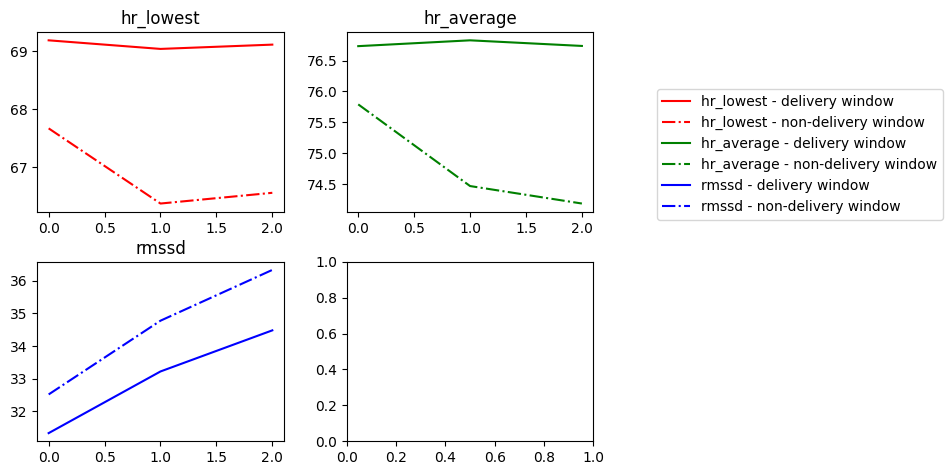

In [56]:
f, ax = plt.subplots(2, 2)
f.tight_layout(pad=1.5)
legend_labels = []
for i in range(10,13):
    print(label[i])
    legend_labels.append(f'{label[i]} - delivery window')
    legend_labels.append(f'{label[i]} - non-delivery window')
pos1, = ax[0][0].plot(pos_mean[10], 'r')
neg1, = ax[0][0].plot(neg_mean[10], 'r-.')
ax[0][0].title.set_text(label[10])

pos2, = ax[0][1].plot(pos_mean[11], 'g')
neg2, = ax[0][1].plot(neg_mean[11], 'g-.')
ax[0][1].title.set_text(label[11])

pos3, = ax[1][0].plot(pos_mean[12], 'b')
neg3, = ax[1][0].plot(neg_mean[12], 'b-.')
ax[1][0].title.set_text(label[12])

plt.legend([pos1, neg1, pos2, neg2, pos3, neg3], legend_labels, bbox_to_anchor=(2.45, 2))
plt.show()

deep
light
awake
rem


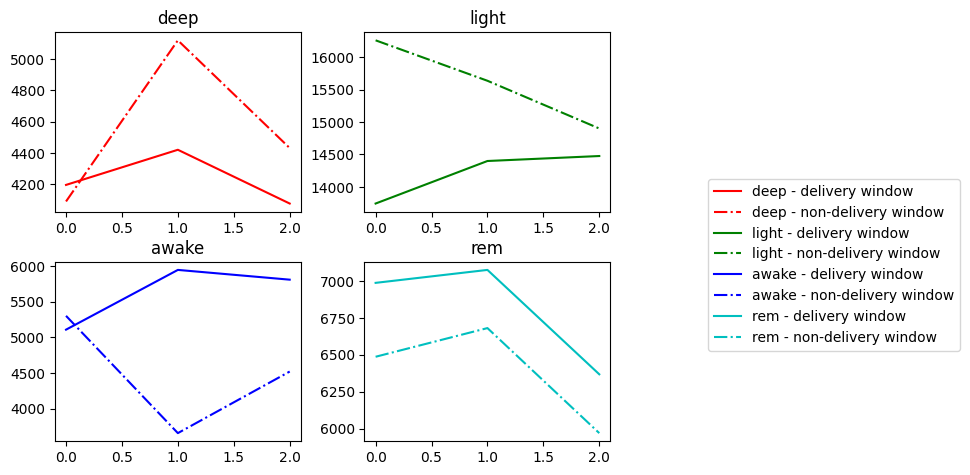

In [58]:
f, ax = plt.subplots(2, 2)
f.tight_layout(pad=1.5)
legend_labels = []
for i in range(13,17):
    print(label[i])
    legend_labels.append(f'{label[i]} - delivery window')
    legend_labels.append(f'{label[i]} - non-delivery window')
pos1, = ax[0][0].plot(pos_mean[13], 'r')
neg1, = ax[0][0].plot(neg_mean[13], 'r-.')
ax[0][0].title.set_text(label[13])

pos2, = ax[0][1].plot(pos_mean[14], 'g')
neg2, = ax[0][1].plot(neg_mean[14], 'g-.')
ax[0][1].title.set_text(label[14])

pos3, = ax[1][0].plot(pos_mean[15], 'b')
neg3, = ax[1][0].plot(neg_mean[15], 'b-.')
ax[1][0].title.set_text(label[15])

pos4, = ax[1][1].plot(pos_mean[16], 'c')
neg4, = ax[1][1].plot(neg_mean[16], 'c-.')
ax[1][1].title.set_text(label[16])

plt.legend([pos1, neg1, pos2, neg2, pos3, neg3, pos4, neg4, pos5], legend_labels, bbox_to_anchor=(2.45, 1.5))
plt.show()